<a href="https://colab.research.google.com/github/Madhuanabala/SET/blob/clustering/clustering_after_lipinsky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total compounds: 521
Index(['Compound Name', 'Anti-Inflammatory', 'Anti-Oxidant', 'Anti-Cancer',
       'Other Properties'],
      dtype='object')
  Compound Name  Anti-Inflammatory  Anti-Oxidant  Anti-Cancer  \
0      Curcumin                  1             1            0   
1   Resveratrol                  1             1            0   
2      Gingerol                  1             0            0   
3  thymoquinone                  1             0            0   
4       salicin                  1             0            0   

   Other Properties  
0                 1  
1                 1  
2                 0  
3                 0  
4                 0  
Number of compounds in each cluster:
  Compound Name  Anti-Inflammatory  Anti-Oxidant  Anti-Cancer  \
0      Curcumin                  1             1            0   
1   Resveratrol                  1             1            0   
2      Gingerol                  1             0            0   
3  thymoquinone                  

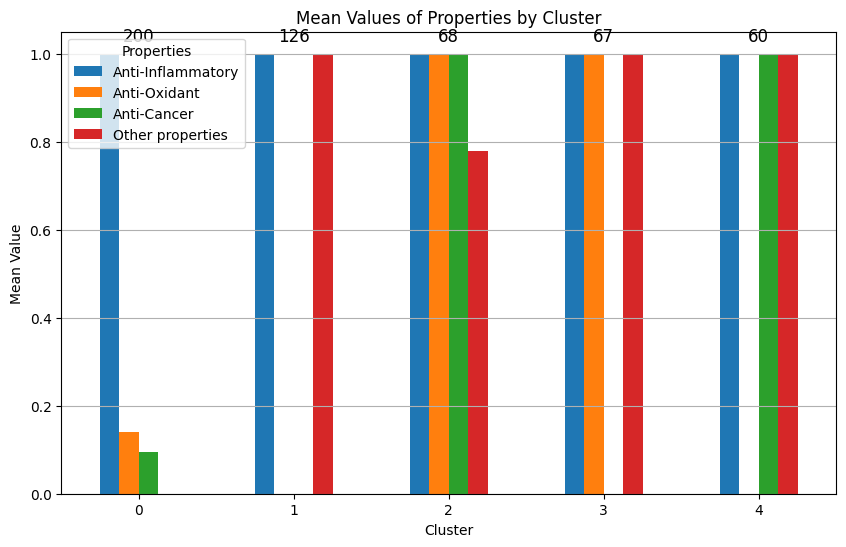

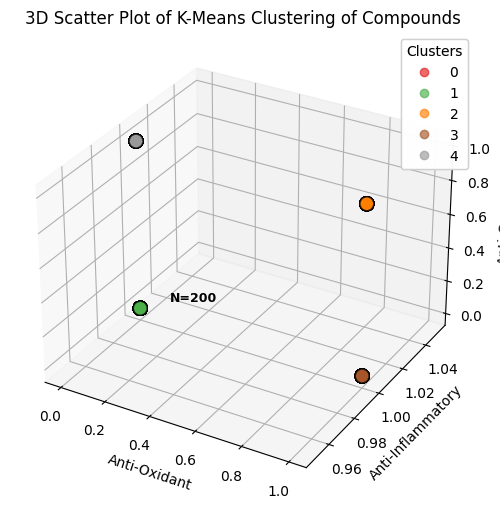

   Cluster       Compound 1    Compound 2  \
0        0         Gingerol  thymoquinone   
1        1        ibuprofen       aspirin   
2        2  Betulinic acid       Galangin   
3        3         Curcumin   Resveratrol   
4        4        TAXIFOLIN  Tanshinone I   

                                          Compound 3     Compound 4  \
0                                            salicin       Apigenin   
1                                         diclofenac   indomethacin   
2  3-Hydroxy-4-prenyl-5-methoxystilbene-2-carboxy...  δ-tocotrienol   
3                                      Roburic acid   Ferulic acid    
4                                      Cepharanthine      Dauricine   

          Compound 5        Compound 6         Compound 7       Compound 8  \
0         Triptolide  chlorogenic acid      chlorojanerin        glabridin   
1  methyl salicylate         enoxolone     Caryophyllene   Andrographolide   
2   (−)-larreatricin  (E,E)-germacrone        4-terpineol         ca

In [33]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
from sklearn.metrics import silhouette_score
file_path = '/content/after lipinksy.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')
print("Total compounds:", len(df))
print(df.keys())
df = pd.read_excel(file_path)
print(df.head())
df = df.rename(columns={'Other Properties': 'Other properties'})
feature_columns = ["Anti-Inflammatory", "Anti-Oxidant", "Anti-Cancer", "Other properties"]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[feature_columns])
if np.any(np.isnan(df[feature_columns])) or np.any(np.isinf(df[feature_columns])):
    df = df.dropna(subset=feature_columns)
    n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
features = ["Anti-Inflammatory", "Anti-Oxidant", "Anti-Cancer", "Other properties"]
df['Cluster'] = kmeans.fit_predict(df[features])
print("Number of compounds in each cluster:")
print(df.head())
print(df['Cluster'].value_counts())
cluster_counts = df['Cluster'].value_counts()
cluster_means = df.groupby('Cluster')[['Anti-Inflammatory', 'Anti-Oxidant', 'Anti-Cancer', 'Other properties']].mean()
print("Mean Values for Each Cluster:")
print(cluster_means)
import matplotlib.pyplot as plt
ax = cluster_means.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values of Properties by Cluster')
plt.ylabel('Mean Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Properties')
for i, count in enumerate(cluster_counts):
   if i < len(ax.patches):
    bar_height = ax.patches[i].get_height()  # Get height of the i-th bar
    ax.text(i, bar_height + 0.02, str(count), ha='center', va='bottom', fontsize=12)
plt.show()
fig = plt.figure(figsize=(6, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    df['Anti-Oxidant'],
    df['Anti-Inflammatory'],
    df['Anti-Cancer'],
    c=df['Cluster'],
    s=df["Other properties"] * 100,
    cmap='Set1',
    alpha=0.6,
    edgecolor='k'
)
ax.set_title('3D Scatter Plot of K-Means Clustering of Compounds')
ax.set_xlabel('Anti-Oxidant')
ax.set_ylabel('Anti-Inflammatory')
ax.set_zlabel('Anti-Cancer')
legend = ax.legend(*scatter.legend_elements(), title='Clusters', loc='upper right')
ax.add_artist(legend)
cluster_counts = df['Cluster'].value_counts()
for cluster in cluster_counts.index:
    count = cluster_counts[cluster]
    ax.text(
        x=df[df['Cluster'] == cluster]['Anti-Oxidant'].mean(),
        y=df[df['Cluster'] == cluster]['Anti-Inflammatory'].mean(),
        z=df[df['Cluster'] == cluster]['Anti-Cancer'].mean(),
        s=f'N={count}',
        color='black',
        fontsize=9,
        weight='bold'
    )
    plt.show()
cluster_distribution = df['Cluster'].value_counts().reset_index()
cluster_distribution.columns = ['Cluster', 'Number of Compounds']
cluster_distribution.to_excel('Cluster_Distribution.xlsx', index=False)
grouped = df.groupby('Cluster')['Compound Name'].apply(list).reset_index()
grouped.columns = ['Cluster', 'Compounds']
compounds_expanded = grouped['Compounds'].apply(pd.Series)
compounds_expanded.columns = [f'Compound {i+1}' for i in range(compounds_expanded.shape[1])]
final_output = pd.concat([grouped[['Cluster']], compounds_expanded], axis=1)
final_output.to_excel('Compounds_by_Cluster.xlsx', index=False)
print(final_output)
silhouette_avg = silhouette_score(scaled_features, df['Cluster'])

print(f'Silhouette Score: {silhouette_avg}')
silhouette_df = pd.DataFrame({'Silhouette Score': [silhouette_avg]})
silhouette_df.to_excel('Clustering_Silhouette_Score.xlsx', index=False)
